In [9]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [44]:
df = pd.read_csv(r'D:\dataset_fyp\newsample.csv')
print(df.dtypes)
df.set_index('Date/Time',inplace=True)
print(df.head(5))
temp = df['Temperature']
bp1 = df['Sys']
bp2 = df['Dias']
bpm = df['BPM']

print(temp.head(5))
print(bp1.head(5))
print(bp2.head(5))
print(bpm.head(5))

Date/Time           object
Air Temperature    float64
Temperature        float64
BPM                float64
Sys                float64
Dias               float64
Activity            object
dtype: object
                     Air Temperature  Temperature       BPM     Sys   Dias  \
Date/Time                                                                    
2022-07-01 00:00:00            31.11    35.889579   66.8000  101.00  68.00   
2022-07-01 04:00:00            30.00    35.981454   66.8000  103.00  65.00   
2022-07-01 08:00:00            31.11    36.709878   80.4611  109.50  71.50   
2022-07-01 12:00:00            33.89    36.954246  130.6000  109.89  72.21   
2022-07-01 16:00:00            33.89    36.887417  130.6000  110.89  73.21   

                     Activity  
Date/Time                      
2022-07-01 00:00:00  Sleeping  
2022-07-01 04:00:00  Sleeping  
2022-07-01 08:00:00   Sitting  
2022-07-01 12:00:00   Walking  
2022-07-01 16:00:00   Walking  
Date/Time
2022-07-01 00:00

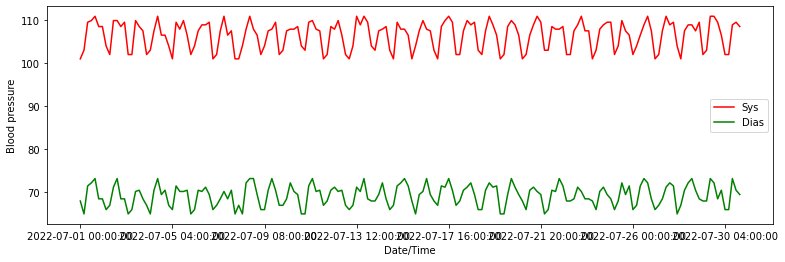

In [45]:
plt.figure(figsize=(13,4)) 
plt.xlabel("Date-Time")
plt.ylabel("Blood pressure")
bp1.plot(color='red')
bp2.plot(color='green')
plt.legend()

In [46]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [47]:
WINDOW_SIZE = 3
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X2, y2 = df_to_X_y(bp1, WINDOW_SIZE)
X3, y3 = df_to_X_y(bp2, WINDOW_SIZE)
X4, y4 = df_to_X_y(bpm, WINDOW_SIZE)
print(X1.shape, y1.shape)
print(X2.shape, y2.shape)
print(X3.shape, y3.shape)
print(X4.shape, y4.shape)

(177, 3, 1) (177,)
(177, 3, 1) (177,)
(177, 3, 1) (177,)
(177, 3, 1) (177,)


In [20]:
WINDOW_SIZE = 6
X4, y4 = df_to_X_y(bpm, WINDOW_SIZE)

In [48]:
X1_train = X1[0:122]
y1_train = y1[0:122]
X1_val = X1[122:150] 
y1_val = y1[122:150]
X1_test = X1[150:176]
y1_test = y1[150:176]
X2_train = X2[0:122]
y2_train = y2[0:122]
X2_val = X2[122:150]
y2_val = y2[122:150]
X2_test = X2[150:176]
y2_test = y2[150:176]
X3_train = X3[0:122]
y3_train = y3[0:122]
X3_val = X3[122:150]
y3_val = y3[122:150]
X3_test = X3[150:176]
y3_test = y3[150:176]
X4_train = X4[0:122] 
y4_train = y4[0:122]
X4_val = X4[122:150]
y4_val = y4[122:150]
X4_test = X4[150:176]
y4_test = y4[150:176]

print(X1_train.shape, y1_train.shape, X1_val.shape, y1_val.shape, X1_test.shape, y1_test.shape)
print(X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape)
print(X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape)
print(X4_train.shape, y4_train.shape, X4_val.shape, y4_val.shape, X4_test.shape, y4_test.shape)


(122, 3, 1) (122,) (28, 3, 1) (28,) (26, 3, 1) (26,)
(122, 3, 1) (122,) (28, 3, 1) (28,) (26, 3, 1) (26,)
(122, 3, 1) (122,) (28, 3, 1) (28,) (26, 3, 1) (26,)
(122, 3, 1) (122,) (28, 3, 1) (28,) (26, 3, 1) (26,)


In [49]:
model1 = Sequential()
model1.add(LSTM(86, activation='ReLU', input_shape=(3, 1), return_sequences=True))
model1.add(LSTM(64, activation='ReLU', return_sequences=False))
#model.add(Dropout(0.1))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse', metrics=RootMeanSquaredError())
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 3, 86)             30272     
                                                                 
 lstm_12 (LSTM)              (None, 64)                38656     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 68,993
Trainable params: 68,993
Non-trainable params: 0
_________________________________________________________________


In [311]:
model2 = Sequential()
model2.add(LSTM(86, activation='ReLU', input_shape=(3, 1), return_sequences=True))
model2.add(LSTM(64, activation='ReLU', return_sequences=False))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse', metrics=RootMeanSquaredError())
model2.summary()

Model: "sequential_123"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_340 (LSTM)             (None, 3, 86)             30272     
                                                                 
 lstm_341 (LSTM)             (None, 64)                38656     
                                                                 
 dense_119 (Dense)           (None, 1)                 65        
                                                                 
Total params: 68,993
Trainable params: 68,993
Non-trainable params: 0
_________________________________________________________________


In [295]:
model3 = Sequential()
model3.add(LSTM(100, activation='ReLU', input_shape=(3, 1), return_sequences=True))
model3.add(LSTM(64, activation='ReLU', return_sequences=True))
model3.add(LSTM(32, activation='ReLU', return_sequences=False))
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mse', metrics=RootMeanSquaredError())
model3.summary()

Model: "sequential_118"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_327 (LSTM)             (None, 3, 100)            40800     
                                                                 
 lstm_328 (LSTM)             (None, 3, 64)             42240     
                                                                 
 lstm_329 (LSTM)             (None, 32)                12416     
                                                                 
 dense_115 (Dense)           (None, 1)                 33        
                                                                 
Total params: 95,489
Trainable params: 95,489
Non-trainable params: 0
_________________________________________________________________


In [26]:
model4 = Sequential()
model4.add(LSTM(126, activation='ReLU', input_shape=(3, 1), return_sequences=False))
#model4.add(LSTM(84, activation='LeakyReLU', return_sequences=True))
#model4.add(LSTM(64, activation='LeakyReLU', return_sequences=False))
#model4.add(LSTM(64, activation='ReLU', return_sequences=True))
#model4.add(LSTM(32, activation='ReLU', return_sequences=False))
#model.add(Dropout(0.1))
model4.add(Dense(1))
model4.compile(optimizer='adam', loss='mse', metrics=RootMeanSquaredError())
#model4.summary()

#model4 = Sequential()
#model4.add(InputLayer((2, 1)))
#model4.add(LSTM(64, activation='ReLU', return_sequences=False))
#model4.add(Dense(1, 'linear'))
#model4.compile(optimizer='adam', loss='mse', metrics=RootMeanSquaredError())
#model4.summary()

In [50]:
model1.fit(X1_train, y1_train, validation_data=(X1_val, y1_val), epochs=100)


Epoch 1/100
4/4 [==============================] - 2s 130ms/step - loss: 1273.3885 - root_mean_squared_error: 35.6846 - val_loss: 1145.3625 - val_root_mean_squared_error: 33.8432
Epoch 2/100
4/4 [==============================] - 0s 19ms/step - loss: 1067.8296 - root_mean_squared_error: 32.6777 - val_loss: 906.9443 - val_root_mean_squared_error: 30.1155
Epoch 3/100
4/4 [==============================] - 0s 15ms/step - loss: 802.3455 - root_mean_squared_error: 28.3257 - val_loss: 580.1426 - val_root_mean_squared_error: 24.0862
Epoch 4/100
4/4 [==============================] - 0s 19ms/step - loss: 434.7034 - root_mean_squared_error: 20.8495 - val_loss: 162.0590 - val_root_mean_squared_error: 12.7302
Epoch 5/100
4/4 [==============================] - 0s 19ms/step - loss: 67.4267 - root_mean_squared_error: 8.2114 - val_loss: 35.0046 - val_root_mean_squared_error: 5.9165
Epoch 6/100
4/4 [==============================] - 0s 40ms/step - loss: 91.4398 - root_mean_squared_error: 9.5624 - val_

Epoch 49/100
4/4 [==============================] - 0s 14ms/step - loss: 0.3428 - root_mean_squared_error: 0.5855 - val_loss: 0.2377 - val_root_mean_squared_error: 0.4875
Epoch 50/100
4/4 [==============================] - 0s 15ms/step - loss: 0.3401 - root_mean_squared_error: 0.5832 - val_loss: 0.2362 - val_root_mean_squared_error: 0.4860
Epoch 51/100
4/4 [==============================] - 0s 29ms/step - loss: 0.3411 - root_mean_squared_error: 0.5840 - val_loss: 0.2360 - val_root_mean_squared_error: 0.4858
Epoch 52/100
4/4 [==============================] - 0s 15ms/step - loss: 0.3399 - root_mean_squared_error: 0.5830 - val_loss: 0.2351 - val_root_mean_squared_error: 0.4849
Epoch 53/100
4/4 [==============================] - 0s 15ms/step - loss: 0.3408 - root_mean_squared_error: 0.5838 - val_loss: 0.2352 - val_root_mean_squared_error: 0.4850
Epoch 54/100
4/4 [==============================] - 0s 16ms/step - loss: 0.3415 - root_mean_squared_error: 0.5844 - val_loss: 0.2364 - val_root_m

Epoch 97/100
4/4 [==============================] - 0s 14ms/step - loss: 0.3455 - root_mean_squared_error: 0.5878 - val_loss: 0.2332 - val_root_mean_squared_error: 0.4829
Epoch 98/100
4/4 [==============================] - 0s 13ms/step - loss: 0.3501 - root_mean_squared_error: 0.5917 - val_loss: 0.2322 - val_root_mean_squared_error: 0.4819
Epoch 99/100
4/4 [==============================] - 0s 13ms/step - loss: 0.3448 - root_mean_squared_error: 0.5872 - val_loss: 0.2501 - val_root_mean_squared_error: 0.5001
Epoch 100/100
4/4 [==============================] - 0s 18ms/step - loss: 0.3400 - root_mean_squared_error: 0.5831 - val_loss: 0.2333 - val_root_mean_squared_error: 0.4830


In [312]:
model2.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=88)


Epoch 1/88
4/4 [==============================] - 16s 228ms/step - loss: 11053.6963 - root_mean_squared_error: 105.1366 - val_loss: 10572.4512 - val_root_mean_squared_error: 102.8224
Epoch 2/88
4/4 [==============================] - 0s 29ms/step - loss: 10388.8809 - root_mean_squared_error: 101.9259 - val_loss: 9795.8545 - val_root_mean_squared_error: 98.9740
Epoch 3/88
4/4 [==============================] - 0s 41ms/step - loss: 9525.7197 - root_mean_squared_error: 97.5998 - val_loss: 8749.5547 - val_root_mean_squared_error: 93.5391
Epoch 4/88
4/4 [==============================] - 0s 29ms/step - loss: 8313.8877 - root_mean_squared_error: 91.1805 - val_loss: 7181.4800 - val_root_mean_squared_error: 84.7436
Epoch 5/88
4/4 [==============================] - 0s 26ms/step - loss: 6484.4209 - root_mean_squared_error: 80.5259 - val_loss: 4849.6772 - val_root_mean_squared_error: 69.6396
Epoch 6/88
4/4 [==============================] - 0s 25ms/step - loss: 3868.3857 - root_mean_squared_error:

In [300]:
model3.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=77)


Epoch 1/77
4/4 [==============================] - 5s 276ms/step - loss: 4612.5737 - root_mean_squared_error: 67.9159 - val_loss: 4176.9917 - val_root_mean_squared_error: 64.6297
Epoch 2/77
4/4 [==============================] - 0s 18ms/step - loss: 3811.6648 - root_mean_squared_error: 61.7387 - val_loss: 2971.1106 - val_root_mean_squared_error: 54.5079
Epoch 3/77
4/4 [==============================] - 0s 16ms/step - loss: 2394.2849 - root_mean_squared_error: 48.9314 - val_loss: 1231.7372 - val_root_mean_squared_error: 35.0961
Epoch 4/77
4/4 [==============================] - 0s 19ms/step - loss: 709.5470 - root_mean_squared_error: 26.6373 - val_loss: 29.4552 - val_root_mean_squared_error: 5.4273
Epoch 5/77
4/4 [==============================] - 0s 18ms/step - loss: 114.8226 - root_mean_squared_error: 10.7155 - val_loss: 272.7177 - val_root_mean_squared_error: 16.5142
Epoch 6/77
4/4 [==============================] - 0s 17ms/step - loss: 213.5350 - root_mean_squared_error: 14.6128 - val

In [27]:
model4.fit(X4_train, y4_train, validation_data=(X4_val, y4_val), epochs=1000)


Epoch 1/1000
4/4 [==============================] - 1s 82ms/step - loss: 8947.0117 - root_mean_squared_error: 94.5886 - val_loss: 7368.3506 - val_root_mean_squared_error: 85.8391
Epoch 2/1000
4/4 [==============================] - 0s 18ms/step - loss: 7670.0449 - root_mean_squared_error: 87.5788 - val_loss: 6153.1919 - val_root_mean_squared_error: 78.4423
Epoch 3/1000
4/4 [==============================] - 0s 16ms/step - loss: 6414.2368 - root_mean_squared_error: 80.0889 - val_loss: 4868.1963 - val_root_mean_squared_error: 69.7725
Epoch 4/1000
4/4 [==============================] - 0s 15ms/step - loss: 5003.5635 - root_mean_squared_error: 70.7359 - val_loss: 3290.6692 - val_root_mean_squared_error: 57.3644
Epoch 5/1000
4/4 [==============================] - 0s 18ms/step - loss: 3344.1624 - root_mean_squared_error: 57.8287 - val_loss: 1989.5992 - val_root_mean_squared_error: 44.6049
Epoch 6/1000
4/4 [==============================] - 0s 17ms/step - loss: 2282.7551 - root_mean_squared_er

Epoch 47/1000
4/4 [==============================] - 0s 16ms/step - loss: 168.6383 - root_mean_squared_error: 12.9861 - val_loss: 291.8676 - val_root_mean_squared_error: 17.0841
Epoch 48/1000
4/4 [==============================] - 0s 13ms/step - loss: 162.6140 - root_mean_squared_error: 12.7520 - val_loss: 295.0250 - val_root_mean_squared_error: 17.1763
Epoch 49/1000
4/4 [==============================] - 0s 14ms/step - loss: 162.9878 - root_mean_squared_error: 12.7667 - val_loss: 291.8543 - val_root_mean_squared_error: 17.0837
Epoch 50/1000
4/4 [==============================] - 0s 14ms/step - loss: 163.0886 - root_mean_squared_error: 12.7706 - val_loss: 292.4682 - val_root_mean_squared_error: 17.1017
Epoch 51/1000
4/4 [==============================] - 0s 14ms/step - loss: 161.1720 - root_mean_squared_error: 12.6954 - val_loss: 292.1481 - val_root_mean_squared_error: 17.0923
Epoch 52/1000
4/4 [==============================] - 0s 13ms/step - loss: 173.6344 - root_mean_squared_error: 

4/4 [==============================] - 0s 14ms/step - loss: 149.7836 - root_mean_squared_error: 12.2386 - val_loss: 287.4326 - val_root_mean_squared_error: 16.9538
Epoch 94/1000
4/4 [==============================] - 0s 14ms/step - loss: 154.6666 - root_mean_squared_error: 12.4365 - val_loss: 292.3042 - val_root_mean_squared_error: 17.0969
Epoch 95/1000
4/4 [==============================] - 0s 14ms/step - loss: 153.6209 - root_mean_squared_error: 12.3944 - val_loss: 299.5974 - val_root_mean_squared_error: 17.3089
Epoch 96/1000
4/4 [==============================] - 0s 13ms/step - loss: 151.7014 - root_mean_squared_error: 12.3167 - val_loss: 297.0858 - val_root_mean_squared_error: 17.2362
Epoch 97/1000
4/4 [==============================] - 0s 19ms/step - loss: 156.7356 - root_mean_squared_error: 12.5194 - val_loss: 293.2422 - val_root_mean_squared_error: 17.1243
Epoch 98/1000
4/4 [==============================] - 0s 13ms/step - loss: 156.1157 - root_mean_squared_error: 12.4946 - val_

Epoch 139/1000
4/4 [==============================] - 0s 15ms/step - loss: 160.8548 - root_mean_squared_error: 12.6829 - val_loss: 294.0235 - val_root_mean_squared_error: 17.1471
Epoch 140/1000
4/4 [==============================] - 0s 16ms/step - loss: 150.0807 - root_mean_squared_error: 12.2507 - val_loss: 286.3261 - val_root_mean_squared_error: 16.9212
Epoch 141/1000
4/4 [==============================] - 0s 12ms/step - loss: 155.8461 - root_mean_squared_error: 12.4838 - val_loss: 314.0919 - val_root_mean_squared_error: 17.7226
Epoch 142/1000
4/4 [==============================] - 0s 12ms/step - loss: 162.3068 - root_mean_squared_error: 12.7400 - val_loss: 279.6547 - val_root_mean_squared_error: 16.7229
Epoch 143/1000
4/4 [==============================] - 0s 13ms/step - loss: 147.5105 - root_mean_squared_error: 12.1454 - val_loss: 300.2796 - val_root_mean_squared_error: 17.3286
Epoch 144/1000
4/4 [==============================] - 0s 12ms/step - loss: 154.2639 - root_mean_squared_e

Epoch 185/1000
4/4 [==============================] - 0s 17ms/step - loss: 154.1868 - root_mean_squared_error: 12.4172 - val_loss: 294.0474 - val_root_mean_squared_error: 17.1478
Epoch 186/1000
4/4 [==============================] - 0s 17ms/step - loss: 153.0818 - root_mean_squared_error: 12.3726 - val_loss: 297.0709 - val_root_mean_squared_error: 17.2357
Epoch 187/1000
4/4 [==============================] - 0s 17ms/step - loss: 152.2377 - root_mean_squared_error: 12.3385 - val_loss: 286.1102 - val_root_mean_squared_error: 16.9148
Epoch 188/1000
4/4 [==============================] - 0s 17ms/step - loss: 149.6405 - root_mean_squared_error: 12.2328 - val_loss: 292.1528 - val_root_mean_squared_error: 17.0925
Epoch 189/1000
4/4 [==============================] - 0s 15ms/step - loss: 151.2071 - root_mean_squared_error: 12.2966 - val_loss: 292.3792 - val_root_mean_squared_error: 17.0991
Epoch 190/1000
4/4 [==============================] - 0s 14ms/step - loss: 153.0561 - root_mean_squared_e

Epoch 231/1000
4/4 [==============================] - 0s 18ms/step - loss: 147.7100 - root_mean_squared_error: 12.1536 - val_loss: 317.4104 - val_root_mean_squared_error: 17.8160
Epoch 232/1000
4/4 [==============================] - 0s 13ms/step - loss: 154.6605 - root_mean_squared_error: 12.4363 - val_loss: 290.0060 - val_root_mean_squared_error: 17.0296
Epoch 233/1000
4/4 [==============================] - 0s 13ms/step - loss: 147.5668 - root_mean_squared_error: 12.1477 - val_loss: 293.6820 - val_root_mean_squared_error: 17.1372
Epoch 234/1000
4/4 [==============================] - 0s 12ms/step - loss: 159.5972 - root_mean_squared_error: 12.6332 - val_loss: 296.8161 - val_root_mean_squared_error: 17.2284
Epoch 235/1000
4/4 [==============================] - 0s 15ms/step - loss: 163.4952 - root_mean_squared_error: 12.7865 - val_loss: 289.7102 - val_root_mean_squared_error: 17.0209
Epoch 236/1000
4/4 [==============================] - 0s 13ms/step - loss: 149.0243 - root_mean_squared_e

Epoch 277/1000
4/4 [==============================] - 0s 13ms/step - loss: 150.0089 - root_mean_squared_error: 12.2478 - val_loss: 281.7134 - val_root_mean_squared_error: 16.7843
Epoch 278/1000
4/4 [==============================] - 0s 14ms/step - loss: 155.2268 - root_mean_squared_error: 12.4590 - val_loss: 289.7984 - val_root_mean_squared_error: 17.0235
Epoch 279/1000
4/4 [==============================] - 0s 14ms/step - loss: 154.5459 - root_mean_squared_error: 12.4317 - val_loss: 303.4681 - val_root_mean_squared_error: 17.4203
Epoch 280/1000
4/4 [==============================] - 0s 14ms/step - loss: 152.8492 - root_mean_squared_error: 12.3632 - val_loss: 288.5067 - val_root_mean_squared_error: 16.9855
Epoch 281/1000
4/4 [==============================] - 0s 16ms/step - loss: 151.4137 - root_mean_squared_error: 12.3050 - val_loss: 302.3572 - val_root_mean_squared_error: 17.3884
Epoch 282/1000
4/4 [==============================] - 0s 21ms/step - loss: 150.1133 - root_mean_squared_e

Epoch 323/1000
4/4 [==============================] - 0s 17ms/step - loss: 150.9142 - root_mean_squared_error: 12.2847 - val_loss: 300.9954 - val_root_mean_squared_error: 17.3492
Epoch 324/1000
4/4 [==============================] - 0s 16ms/step - loss: 146.9469 - root_mean_squared_error: 12.1222 - val_loss: 294.8432 - val_root_mean_squared_error: 17.1710
Epoch 325/1000
4/4 [==============================] - 0s 16ms/step - loss: 149.5881 - root_mean_squared_error: 12.2306 - val_loss: 289.5297 - val_root_mean_squared_error: 17.0156
Epoch 326/1000
4/4 [==============================] - 0s 15ms/step - loss: 149.0710 - root_mean_squared_error: 12.2095 - val_loss: 291.8669 - val_root_mean_squared_error: 17.0841
Epoch 327/1000
4/4 [==============================] - 0s 15ms/step - loss: 147.2994 - root_mean_squared_error: 12.1367 - val_loss: 293.1312 - val_root_mean_squared_error: 17.1211
Epoch 328/1000
4/4 [==============================] - 0s 16ms/step - loss: 151.0508 - root_mean_squared_e

Epoch 369/1000
4/4 [==============================] - 0s 13ms/step - loss: 168.6482 - root_mean_squared_error: 12.9865 - val_loss: 291.6825 - val_root_mean_squared_error: 17.0787
Epoch 370/1000
4/4 [==============================] - 0s 12ms/step - loss: 163.8971 - root_mean_squared_error: 12.8022 - val_loss: 325.6418 - val_root_mean_squared_error: 18.0455
Epoch 371/1000
4/4 [==============================] - 0s 13ms/step - loss: 155.5881 - root_mean_squared_error: 12.4735 - val_loss: 290.5670 - val_root_mean_squared_error: 17.0460
Epoch 372/1000
4/4 [==============================] - 0s 13ms/step - loss: 156.4456 - root_mean_squared_error: 12.5078 - val_loss: 301.2883 - val_root_mean_squared_error: 17.3577
Epoch 373/1000
4/4 [==============================] - 0s 12ms/step - loss: 161.7884 - root_mean_squared_error: 12.7196 - val_loss: 291.4457 - val_root_mean_squared_error: 17.0718
Epoch 374/1000
4/4 [==============================] - 0s 13ms/step - loss: 149.3544 - root_mean_squared_e

Epoch 415/1000
4/4 [==============================] - 0s 13ms/step - loss: 163.5013 - root_mean_squared_error: 12.7868 - val_loss: 286.9517 - val_root_mean_squared_error: 16.9396
Epoch 416/1000
4/4 [==============================] - 0s 13ms/step - loss: 165.7903 - root_mean_squared_error: 12.8760 - val_loss: 289.2801 - val_root_mean_squared_error: 17.0082
Epoch 417/1000
4/4 [==============================] - 0s 12ms/step - loss: 159.8760 - root_mean_squared_error: 12.6442 - val_loss: 315.7776 - val_root_mean_squared_error: 17.7701
Epoch 418/1000
4/4 [==============================] - 0s 13ms/step - loss: 149.3196 - root_mean_squared_error: 12.2196 - val_loss: 286.5882 - val_root_mean_squared_error: 16.9289
Epoch 419/1000
4/4 [==============================] - 0s 13ms/step - loss: 152.3357 - root_mean_squared_error: 12.3424 - val_loss: 297.6971 - val_root_mean_squared_error: 17.2539
Epoch 420/1000
4/4 [==============================] - 0s 14ms/step - loss: 147.3402 - root_mean_squared_e

Epoch 461/1000
4/4 [==============================] - 0s 14ms/step - loss: 165.5955 - root_mean_squared_error: 12.8684 - val_loss: 287.8065 - val_root_mean_squared_error: 16.9649
Epoch 462/1000
4/4 [==============================] - 0s 18ms/step - loss: 146.6215 - root_mean_squared_error: 12.1087 - val_loss: 313.5456 - val_root_mean_squared_error: 17.7072
Epoch 463/1000
4/4 [==============================] - 0s 33ms/step - loss: 156.4357 - root_mean_squared_error: 12.5074 - val_loss: 280.6547 - val_root_mean_squared_error: 16.7528
Epoch 464/1000
4/4 [==============================] - 0s 25ms/step - loss: 150.6221 - root_mean_squared_error: 12.2728 - val_loss: 297.1585 - val_root_mean_squared_error: 17.2383
Epoch 465/1000
4/4 [==============================] - 0s 22ms/step - loss: 160.3736 - root_mean_squared_error: 12.6639 - val_loss: 300.0791 - val_root_mean_squared_error: 17.3228
Epoch 466/1000
4/4 [==============================] - 0s 19ms/step - loss: 172.7513 - root_mean_squared_e

Epoch 507/1000
4/4 [==============================] - 0s 13ms/step - loss: 148.7496 - root_mean_squared_error: 12.1963 - val_loss: 291.8518 - val_root_mean_squared_error: 17.0837
Epoch 508/1000
4/4 [==============================] - 0s 14ms/step - loss: 145.9568 - root_mean_squared_error: 12.0813 - val_loss: 284.6549 - val_root_mean_squared_error: 16.8717
Epoch 509/1000
4/4 [==============================] - 0s 14ms/step - loss: 146.2735 - root_mean_squared_error: 12.0944 - val_loss: 286.9748 - val_root_mean_squared_error: 16.9403
Epoch 510/1000
4/4 [==============================] - 0s 14ms/step - loss: 149.2591 - root_mean_squared_error: 12.2172 - val_loss: 280.9936 - val_root_mean_squared_error: 16.7629
Epoch 511/1000
4/4 [==============================] - 0s 13ms/step - loss: 154.3290 - root_mean_squared_error: 12.4229 - val_loss: 288.9396 - val_root_mean_squared_error: 16.9982
Epoch 512/1000
4/4 [==============================] - 0s 14ms/step - loss: 142.5929 - root_mean_squared_e

Epoch 553/1000
4/4 [==============================] - 0s 13ms/step - loss: 148.0744 - root_mean_squared_error: 12.1686 - val_loss: 280.6812 - val_root_mean_squared_error: 16.7535
Epoch 554/1000
4/4 [==============================] - 0s 14ms/step - loss: 152.1050 - root_mean_squared_error: 12.3331 - val_loss: 288.5326 - val_root_mean_squared_error: 16.9862
Epoch 555/1000
4/4 [==============================] - 0s 20ms/step - loss: 147.8878 - root_mean_squared_error: 12.1609 - val_loss: 313.7625 - val_root_mean_squared_error: 17.7133
Epoch 556/1000
4/4 [==============================] - 0s 14ms/step - loss: 148.2057 - root_mean_squared_error: 12.1740 - val_loss: 285.2303 - val_root_mean_squared_error: 16.8888
Epoch 557/1000
4/4 [==============================] - 0s 13ms/step - loss: 147.8188 - root_mean_squared_error: 12.1581 - val_loss: 283.9923 - val_root_mean_squared_error: 16.8521
Epoch 558/1000
4/4 [==============================] - 0s 14ms/step - loss: 152.0730 - root_mean_squared_e

Epoch 599/1000
4/4 [==============================] - 0s 14ms/step - loss: 153.4245 - root_mean_squared_error: 12.3865 - val_loss: 286.2112 - val_root_mean_squared_error: 16.9178
Epoch 600/1000
4/4 [==============================] - 0s 15ms/step - loss: 145.6982 - root_mean_squared_error: 12.0706 - val_loss: 299.7232 - val_root_mean_squared_error: 17.3125
Epoch 601/1000
4/4 [==============================] - 0s 15ms/step - loss: 152.3150 - root_mean_squared_error: 12.3416 - val_loss: 278.7368 - val_root_mean_squared_error: 16.6954
Epoch 602/1000
4/4 [==============================] - 0s 14ms/step - loss: 153.3579 - root_mean_squared_error: 12.3838 - val_loss: 288.4176 - val_root_mean_squared_error: 16.9829
Epoch 603/1000
4/4 [==============================] - 0s 14ms/step - loss: 144.1150 - root_mean_squared_error: 12.0048 - val_loss: 308.9742 - val_root_mean_squared_error: 17.5777
Epoch 604/1000
4/4 [==============================] - 0s 13ms/step - loss: 146.9519 - root_mean_squared_e

Epoch 645/1000
4/4 [==============================] - 0s 13ms/step - loss: 146.0296 - root_mean_squared_error: 12.0843 - val_loss: 283.7376 - val_root_mean_squared_error: 16.8445
Epoch 646/1000
4/4 [==============================] - 0s 13ms/step - loss: 147.2626 - root_mean_squared_error: 12.1352 - val_loss: 282.0579 - val_root_mean_squared_error: 16.7946
Epoch 647/1000
4/4 [==============================] - 0s 14ms/step - loss: 144.9367 - root_mean_squared_error: 12.0390 - val_loss: 282.4518 - val_root_mean_squared_error: 16.8063
Epoch 648/1000
4/4 [==============================] - 0s 14ms/step - loss: 144.1653 - root_mean_squared_error: 12.0069 - val_loss: 293.3581 - val_root_mean_squared_error: 17.1277
Epoch 649/1000
4/4 [==============================] - 0s 14ms/step - loss: 148.2829 - root_mean_squared_error: 12.1771 - val_loss: 288.4615 - val_root_mean_squared_error: 16.9842
Epoch 650/1000
4/4 [==============================] - 0s 14ms/step - loss: 146.0564 - root_mean_squared_e

Epoch 691/1000
4/4 [==============================] - 0s 13ms/step - loss: 158.9965 - root_mean_squared_error: 12.6094 - val_loss: 279.2971 - val_root_mean_squared_error: 16.7122
Epoch 692/1000
4/4 [==============================] - 0s 13ms/step - loss: 148.8349 - root_mean_squared_error: 12.1998 - val_loss: 306.9449 - val_root_mean_squared_error: 17.5198
Epoch 693/1000
4/4 [==============================] - 0s 12ms/step - loss: 150.9947 - root_mean_squared_error: 12.2880 - val_loss: 281.9755 - val_root_mean_squared_error: 16.7921
Epoch 694/1000
4/4 [==============================] - 0s 12ms/step - loss: 153.8672 - root_mean_squared_error: 12.4043 - val_loss: 283.8735 - val_root_mean_squared_error: 16.8485
Epoch 695/1000
4/4 [==============================] - 0s 13ms/step - loss: 148.5726 - root_mean_squared_error: 12.1890 - val_loss: 298.4745 - val_root_mean_squared_error: 17.2764
Epoch 696/1000
4/4 [==============================] - 0s 14ms/step - loss: 147.6871 - root_mean_squared_e

Epoch 737/1000
4/4 [==============================] - 0s 15ms/step - loss: 147.1023 - root_mean_squared_error: 12.1286 - val_loss: 299.2807 - val_root_mean_squared_error: 17.2997
Epoch 738/1000
4/4 [==============================] - 0s 22ms/step - loss: 148.3987 - root_mean_squared_error: 12.1819 - val_loss: 276.3934 - val_root_mean_squared_error: 16.6251
Epoch 739/1000
4/4 [==============================] - 0s 15ms/step - loss: 153.0461 - root_mean_squared_error: 12.3712 - val_loss: 286.6061 - val_root_mean_squared_error: 16.9294
Epoch 740/1000
4/4 [==============================] - 0s 16ms/step - loss: 149.8307 - root_mean_squared_error: 12.2405 - val_loss: 302.7737 - val_root_mean_squared_error: 17.4004
Epoch 741/1000
4/4 [==============================] - 0s 16ms/step - loss: 157.0663 - root_mean_squared_error: 12.5326 - val_loss: 286.1389 - val_root_mean_squared_error: 16.9156
Epoch 742/1000
4/4 [==============================] - 0s 14ms/step - loss: 151.5017 - root_mean_squared_e

Epoch 783/1000
4/4 [==============================] - 0s 16ms/step - loss: 150.7506 - root_mean_squared_error: 12.2781 - val_loss: 283.0316 - val_root_mean_squared_error: 16.8235
Epoch 784/1000
4/4 [==============================] - 0s 14ms/step - loss: 147.4823 - root_mean_squared_error: 12.1442 - val_loss: 298.0901 - val_root_mean_squared_error: 17.2653
Epoch 785/1000
4/4 [==============================] - 0s 14ms/step - loss: 146.6235 - root_mean_squared_error: 12.1088 - val_loss: 289.5431 - val_root_mean_squared_error: 17.0160
Epoch 786/1000
4/4 [==============================] - 0s 16ms/step - loss: 143.7306 - root_mean_squared_error: 11.9888 - val_loss: 293.3496 - val_root_mean_squared_error: 17.1275
Epoch 787/1000
4/4 [==============================] - 0s 13ms/step - loss: 144.1168 - root_mean_squared_error: 12.0049 - val_loss: 290.3011 - val_root_mean_squared_error: 17.0382
Epoch 788/1000
4/4 [==============================] - 0s 13ms/step - loss: 146.2266 - root_mean_squared_e

Epoch 829/1000
4/4 [==============================] - 0s 16ms/step - loss: 150.3011 - root_mean_squared_error: 12.2597 - val_loss: 287.6315 - val_root_mean_squared_error: 16.9597
Epoch 830/1000
4/4 [==============================] - 0s 13ms/step - loss: 144.7562 - root_mean_squared_error: 12.0315 - val_loss: 286.5042 - val_root_mean_squared_error: 16.9264
Epoch 831/1000
4/4 [==============================] - 0s 13ms/step - loss: 146.0418 - root_mean_squared_error: 12.0848 - val_loss: 282.9267 - val_root_mean_squared_error: 16.8204
Epoch 832/1000
4/4 [==============================] - 0s 13ms/step - loss: 150.1031 - root_mean_squared_error: 12.2517 - val_loss: 286.8148 - val_root_mean_squared_error: 16.9356
Epoch 833/1000
4/4 [==============================] - 0s 14ms/step - loss: 145.2702 - root_mean_squared_error: 12.0528 - val_loss: 295.8244 - val_root_mean_squared_error: 17.1995
Epoch 834/1000
4/4 [==============================] - 0s 14ms/step - loss: 149.3027 - root_mean_squared_e

Epoch 875/1000
4/4 [==============================] - 0s 13ms/step - loss: 151.5228 - root_mean_squared_error: 12.3095 - val_loss: 297.6794 - val_root_mean_squared_error: 17.2534
Epoch 876/1000
4/4 [==============================] - 0s 15ms/step - loss: 149.1584 - root_mean_squared_error: 12.2130 - val_loss: 280.8084 - val_root_mean_squared_error: 16.7573
Epoch 877/1000
4/4 [==============================] - 0s 17ms/step - loss: 145.0017 - root_mean_squared_error: 12.0417 - val_loss: 292.2304 - val_root_mean_squared_error: 17.0947
Epoch 878/1000
4/4 [==============================] - 0s 13ms/step - loss: 145.9268 - root_mean_squared_error: 12.0800 - val_loss: 295.0437 - val_root_mean_squared_error: 17.1768
Epoch 879/1000
4/4 [==============================] - 0s 13ms/step - loss: 145.8150 - root_mean_squared_error: 12.0754 - val_loss: 282.1640 - val_root_mean_squared_error: 16.7977
Epoch 880/1000
4/4 [==============================] - 0s 13ms/step - loss: 150.9904 - root_mean_squared_e

Epoch 921/1000
4/4 [==============================] - 0s 14ms/step - loss: 147.0737 - root_mean_squared_error: 12.1274 - val_loss: 283.0533 - val_root_mean_squared_error: 16.8242
Epoch 922/1000
4/4 [==============================] - 0s 14ms/step - loss: 145.7682 - root_mean_squared_error: 12.0735 - val_loss: 295.1621 - val_root_mean_squared_error: 17.1803
Epoch 923/1000
4/4 [==============================] - 0s 14ms/step - loss: 146.2175 - root_mean_squared_error: 12.0920 - val_loss: 280.7430 - val_root_mean_squared_error: 16.7554
Epoch 924/1000
4/4 [==============================] - 0s 14ms/step - loss: 144.5484 - root_mean_squared_error: 12.0228 - val_loss: 282.1128 - val_root_mean_squared_error: 16.7962
Epoch 925/1000
4/4 [==============================] - 0s 14ms/step - loss: 144.2544 - root_mean_squared_error: 12.0106 - val_loss: 288.9073 - val_root_mean_squared_error: 16.9973
Epoch 926/1000
4/4 [==============================] - 0s 15ms/step - loss: 144.5619 - root_mean_squared_e

Epoch 967/1000
4/4 [==============================] - 0s 15ms/step - loss: 150.2519 - root_mean_squared_error: 12.2577 - val_loss: 273.4974 - val_root_mean_squared_error: 16.5378
Epoch 968/1000
4/4 [==============================] - 0s 13ms/step - loss: 143.6923 - root_mean_squared_error: 11.9872 - val_loss: 293.6250 - val_root_mean_squared_error: 17.1355
Epoch 969/1000
4/4 [==============================] - 0s 13ms/step - loss: 148.0686 - root_mean_squared_error: 12.1683 - val_loss: 279.3454 - val_root_mean_squared_error: 16.7136
Epoch 970/1000
4/4 [==============================] - 0s 14ms/step - loss: 143.5965 - root_mean_squared_error: 11.9832 - val_loss: 285.5087 - val_root_mean_squared_error: 16.8970
Epoch 971/1000
4/4 [==============================] - 0s 14ms/step - loss: 144.8130 - root_mean_squared_error: 12.0338 - val_loss: 278.8192 - val_root_mean_squared_error: 16.6979
Epoch 972/1000
4/4 [==============================] - 0s 12ms/step - loss: 144.0055 - root_mean_squared_e

In [53]:
model1.save(r"D:\dataset_fyp\lstm_models\temp.h5")

In [317]:
model2.save(r"D:\dataset_fyp\lstm_models\sys.h5")

In [ ]:
model3.save(r"D:\dataset_fyp\lstm_models\dias.h5")

In [339]:
model4.save(r"D:\dataset_fyp\lstm_models\hr.h5")

1/1 [==============================] - 0s 284ms/step - loss: 0.2471 - root_mean_squared_error: 0.4971


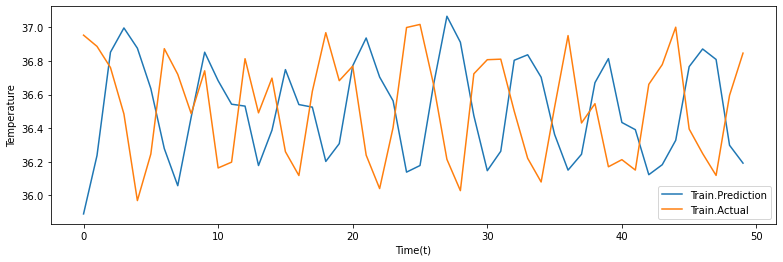

In [51]:
m1 = load_model(r"D:\dataset_fyp\lstm_models\temp.h5")
m1.evaluate(X1_val,y1_val)
train_predictions = model1.predict(X1_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y1_train})
train_results
plt.figure(figsize=(13,4)) 
plt.xlabel("Time(t)")
plt.ylabel("Temperature")
plt.plot(train_results['Train Predictions'][0:50])
plt.plot(train_results['Actuals'][0:50])
plt.legend(['Train.Prediction','Train.Actual'])

1/1 [==============================] - 0s 274ms/step - loss: 12.9617 - root_mean_squared_error: 3.6002


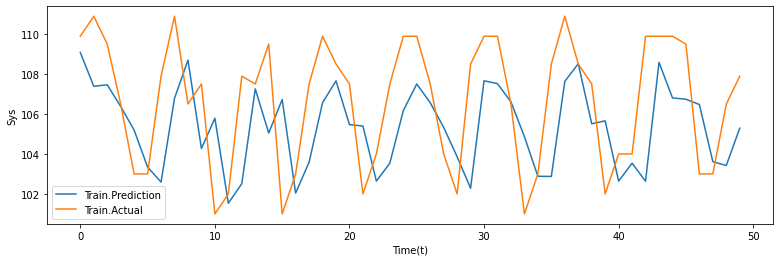

In [15]:
m2 = load_model(r"D:\dataset_fyp\lstm_models\sys.h5")
m2.evaluate(X2_val,y2_val)
train_predictions = m2.predict(X2_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y2_train})
train_results
plt.figure(figsize=(13,4)) 
plt.xlabel("Time(t)")
plt.ylabel("Sys")
plt.plot(train_results['Train Predictions'][0:50])
plt.plot(train_results['Actuals'][0:50])
plt.legend(['Train.Prediction','Train.Actual'])

1/1 [==============================] - 0s 353ms/step - loss: 3.9523 - root_mean_squared_error: 1.9880


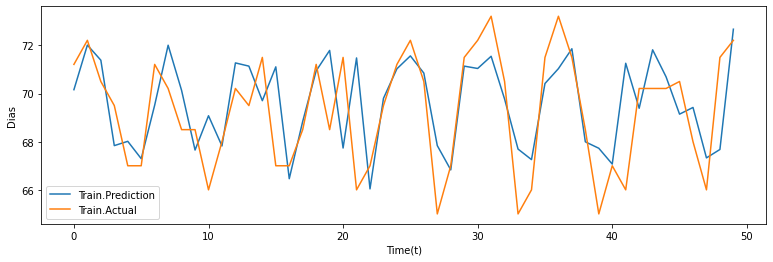

In [16]:
m3 = load_model(r"D:\dataset_fyp\lstm_models\dias.h5")
m3.evaluate(X3_val,y3_val)
train_predictions = m3.predict(X3_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y3_train})
train_results
plt.figure(figsize=(13,4)) 
plt.xlabel("Time(t)")
plt.ylabel("Dias")
plt.plot(train_results['Train Predictions'][0:50])
plt.plot(train_results['Actuals'][0:50])
plt.legend(['Train.Prediction','Train.Actual'])

1/1 [==============================] - 0s 363ms/step - loss: 291.1024 - root_mean_squared_error: 17.0617


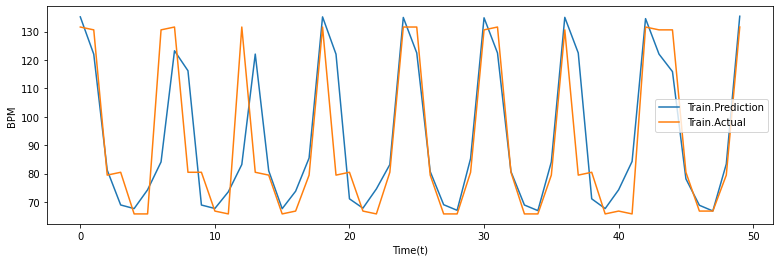

In [22]:
m4 = load_model(r"D:\dataset_fyp\lstm_models\hr.h5")
m4.evaluate(X4_val,y4_val)
train_predictions = m4.predict(X4_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y4_train})
train_results
plt.figure(figsize=(13,4)) 
plt.xlabel("Time(t)")
plt.ylabel("BPM")
plt.plot(train_results['Train Predictions'][0:50])
plt.plot(train_results['Actuals'][0:50])
plt.legend(['Train.Prediction','Train.Actual'])

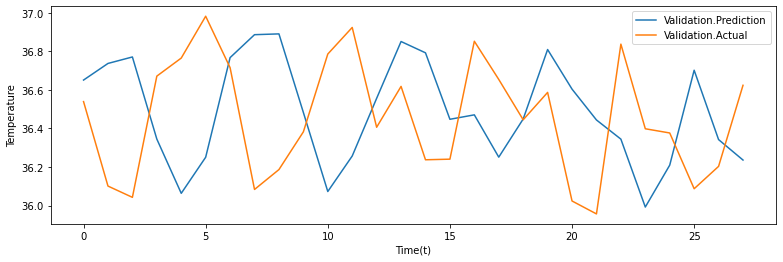

In [52]:
val_predictions = model1.predict(X1_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y1_val})
val_results
plt.figure(figsize=(13,4)) 
plt.xlabel("Time(t)")
plt.ylabel("Temperature")
plt.plot(val_results['Val Predictions'][0:28])
plt.plot(val_results['Actuals'][0:50])
plt.legend(['Validation.Prediction','Validation.Actual'])

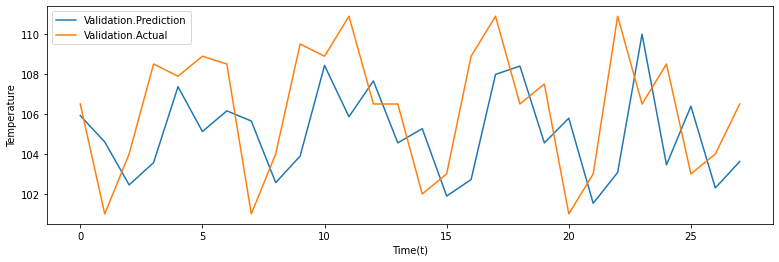

In [30]:
val_predictions = m2.predict(X2_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y2_val})
val_results
plt.figure(figsize=(13,4)) 
plt.xlabel("Time(t)")
plt.ylabel("Temperature")
plt.plot(val_results['Val Predictions'][0:28])
plt.plot(val_results['Actuals'][0:50])
plt.legend(['Validation.Prediction','Validation.Actual'])

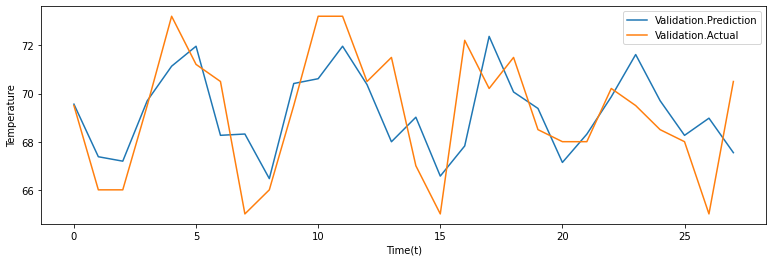

In [31]:
val_predictions = m3.predict(X3_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y3_val})
val_results
plt.figure(figsize=(13,4)) 
plt.xlabel("Time(t)")
plt.ylabel("Temperature")
plt.plot(val_results['Val Predictions'][0:28])
plt.plot(val_results['Actuals'][0:50])
plt.legend(['Validation.Prediction','Validation.Actual'])

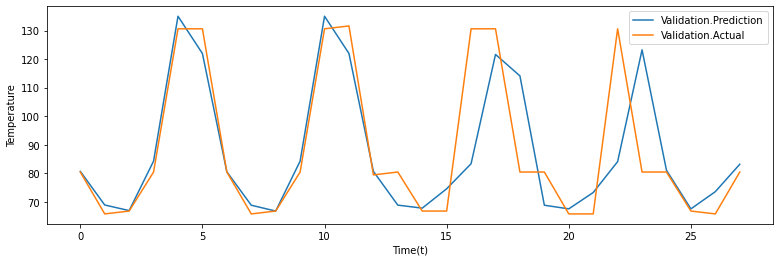

In [32]:
val_predictions = m4.predict(X4_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y4_val})
val_results
plt.figure(figsize=(13,4)) 
plt.xlabel("Time(t)")
plt.ylabel("Temperature")
plt.plot(val_results['Val Predictions'][0:28])
plt.plot(val_results['Actuals'][0:50])
plt.legend(['Validation.Prediction','Validation.Actual'])